In [1]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install NLTK

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [57]:
# Loading packages

import pandas as pd
import numpy as np

#Load data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning packages
import neattext.functions as nfx

from textblob import TextBlob

from collections import Counter

from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [6]:
# Convert the .txt dataset to DataFrame

df1 = pd.read_table("C:/Users/adira/Downloads/emotion_from tweet_intern_project/Training_dataset/Anger_train_set.txt",header=None,sep="\t")
df2 = pd.read_table("C:/Users/adira/Downloads/emotion_from tweet_intern_project/Training_dataset/Fear_train_set.txt",header=None,sep="\t")
df3 = pd.read_table("C:/Users/adira/Downloads/emotion_from tweet_intern_project/Training_dataset/Joy_train_set.txt",header=None,sep="\t")
df4 = pd.read_table("C:/Users/adira/Downloads/emotion_from tweet_intern_project/Training_dataset/Sadness_train_set.txt",header=None,sep="\t")
df1 

,0,1,2,3
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
852,10852,rose incense are the best thing I've ever bought,anger,0.125
853,10853,@jaaames1993 Literally burst out laughing.,anger,0.067
854,10854,Follow up. Follow through. Be . #success,anger,0.125
855,10855,Wrinkles should merely hide where frown have b...,anger,0.125


In [7]:
# Renaming the column names

df1 = df1.rename(columns={1:"Text", 2:"Emotion", 3:'Emotion_Intensity'})
df2 = df2.rename(columns={1:"Text", 2:"Emotion", 3:'Emotion_Intensity'})
df3 = df3.rename(columns={1:"Text", 2:"Emotion", 3:'Emotion_Intensity'})
df4 = df4.rename(columns={1:"Text", 2:"Emotion", 3:'Emotion_Intensity'})
df4

,0,Text,Emotion,Emotion_Intensity
0,40000,Depression sucks! #depression,sadness,0.958
1,40001,Feeling worthless as always #depression,sadness,0.958
2,40002,Feeling worthless as always,sadness,0.958
3,40003,My #Fibromyalgia has been really bad lately wh...,sadness,0.946
4,40004,Im think ima lay in bed all day and sulk. Life...,sadness,0.934
...,...,...,...,...
781,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
782,40782,Just put the winter duvet on â˜ƒï¸â„ï¸ðŸŒ¬â...,sadness,0.104
783,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
784,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [8]:
# Remove column name [0] from all the dataframes

df1 = df1.drop([0], axis = 1 )
df2 = df2.drop([0], axis = 1 )
df3 = df3.drop([0], axis = 1 )
df4 = df4.drop([0], axis = 1 )
df1

,Text,Emotion,Emotion_Intensity
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,So my Indian Uber driver just called someone t...,anger,0.896
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...
852,rose incense are the best thing I've ever bought,anger,0.125
853,@jaaames1993 Literally burst out laughing.,anger,0.067
854,Follow up. Follow through. Be . #success,anger,0.125
855,Wrinkles should merely hide where frown have b...,anger,0.125


In [9]:
# Merging the 4 different dataframes into 1 dataframe

df = pd.concat([df1,df2,df3,df4], ignore_index = True)
df

,Text,Emotion,Emotion_Intensity
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,So my Indian Uber driver just called someone t...,anger,0.896
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,Just put the winter duvet on â˜ƒï¸â„ï¸ðŸŒ¬â...,sadness,0.104
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,@BluesfestByron second artist announcement loo...,sadness,0.083


In [10]:
# Checking the data types of the columns
df.dtypes

Text                  object
Emotion               object
Emotion_Intensity    float64
dtype: object

In [11]:
# Check for missing values

df.isnull().sum()

Text                 0
Emotion              0
Emotion_Intensity    0
dtype: int64

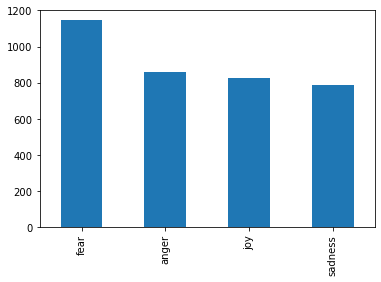

In [12]:
# Value counts of emotions with Histogram

df['Emotion'].value_counts().plot(kind='bar')

# Exploration

   > Text Cleaning
   
   >Sentiment Analysis
   
   >Keyword Extraction for each emotion  

### Text cleaning

   > Remove noise
          - stop words
          - special characters
          - punctuations
          - Emojis

In [13]:
#dir() will return all the available list methods of --> nfx
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [14]:
# Removing ----> Stop words
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

# Removing ---> User handles
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

# Removing ---> Punctuations
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

# Removing ---> Special characters
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

# Removing ---> Emoji's
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_emojis)


In [15]:
# Comparing the original text vs Clean_Text
df[['Text','Clean_Text']]

,Text,Clean_Text
0,How the fu*k! Who the heck! moved my fridge!.....,fuk heck moved fridge knock landlord door angr...
1,So my Indian Uber driver just called someone t...,Indian Uber driver called N word moving vehicl...
2,@DPD_UK I asked for my parcel to be delivered ...,asked parcel delivered pick store address fu...
3,so ef whichever butt wipe pulled the fire alar...,ef whichever butt wipe pulled fire alarm davis...
4,Don't join @BTCare they put the phone down on ...,join phone you talk rude Taking money acc wi...
...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,Thank much home stunned happy think sunk ye...
3609,Just put the winter duvet on â˜ƒï¸â„ï¸ðŸŒ¬â...,winter duvet
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,thats pretty love sky background purple hi...
3611,@BluesfestByron second artist announcement loo...,second artist announcement looking good blue...


In [16]:
df[['Clean_Text','Emotion','Emotion_Intensity']]

,Clean_Text,Emotion,Emotion_Intensity
0,fuk heck moved fridge knock landlord door angr...,anger,0.938
1,Indian Uber driver called N word moving vehicl...,anger,0.896
2,asked parcel delivered pick store address fu...,anger,0.896
3,ef whichever butt wipe pulled fire alarm davis...,anger,0.896
4,join phone you talk rude Taking money acc wi...,anger,0.896
...,...,...,...
3608,Thank much home stunned happy think sunk ye...,sadness,0.104
3609,winter duvet,sadness,0.104
3610,thats pretty love sky background purple hi...,sadness,0.088
3611,second artist announcement looking good blue...,sadness,0.083


### Keyword Extraction

   > Extract most common words for every class in Emotion 
       
                         i.e., Anger, Fear, Joy, Sadness

In [18]:
# Function for extracting most commonest keywords

def extract_keywords(text, num = 50): # ??!!
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [19]:
# List of emotions

emotion_list = df['Emotion'].unique().tolist()
emotion_list

['anger', 'fear', 'joy', 'sadness']

In [20]:
# Let's consider emotion "anger"

df[df['Emotion'] == 'anger']

,Text,Emotion,Emotion_Intensity,Clean_Text
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,fuk heck moved fridge knock landlord door angr...
1,So my Indian Uber driver just called someone t...,anger,0.896,Indian Uber driver called N word moving vehicl...
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,asked parcel delivered pick store address fu...
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896,ef whichever butt wipe pulled fire alarm davis...
4,Don't join @BTCare they put the phone down on ...,anger,0.896,join phone you talk rude Taking money acc wi...
...,...,...,...,...
852,rose incense are the best thing I've ever bought,anger,0.125,rose incense best thing Ive bought
853,@jaaames1993 Literally burst out laughing.,anger,0.067,Literally burst laughing
854,Follow up. Follow through. Be . #success,anger,0.125,Follow up Follow through success
855,Wrinkles should merely hide where frown have b...,anger,0.125,Wrinkles merely hide frown been Mark Twain


In [21]:
angry_list = df[df['Emotion'] == 'anger']['Clean_Text']
fear_list = df[df['Emotion'] == 'fear']['Clean_Text']
joy_list = df[df['Emotion'] == 'joy']['Clean_Text']
sadness_list = df[df['Emotion'] == 'sadness']['Clean_Text']

print(angry_list)

0      fuk heck moved fridge knock landlord door angr...
1      Indian Uber driver called N word moving vehicl...
2        asked parcel delivered pick store address fu...
3      ef whichever butt wipe pulled fire alarm davis...
4      join   phone you talk rude Taking money acc wi...
                             ...                        
852                   rose incense best thing Ive bought
853                             Literally burst laughing
854                    Follow up Follow through  success
855          Wrinkles merely hide frown been  Mark Twain
856                    Love new song cant stop thinking 
Name: Clean_Text, Length: 857, dtype: object


In [22]:
# documents creation of ---> angry, fear, joy, sadness
angry_docx = ' '.join(angry_list)
fear_docx = ' '.join(fear_list)  
joy_docx = ' '.join(joy_list)
sadness_docx = ' '.join(sadness_list)

print(angry_docx)

fuk heck moved fridge knock landlord door angry mad  Indian Uber driver called N word moving vehicle Id jumped disgusted   asked parcel delivered pick store address fuming poorcustomerservice ef whichever butt wipe pulled fire alarm davis bc sound asleep pissed angry upset tired sad tired hangry  join   phone you talk rude Taking money acc willynilly fuming blood boiling got season Wentworth watch stupid cunt work ruins    raging oldcunt   tracking equipment delivered wasnt service suddenly delayed Weve 3 weeks fuming   legit furious him people fucking idiots suppose work that Wtf dude Thanks pissing off im mad power rangers im incensed im furious Wont use     again guys cant right fuming Bitches aggravate like inspires biggest cunt known man kind   come Glasgow night working fucking gutted waiting appearance ages raging Fuking fuming  Zero help   customer service pushing buck forth promising callbacks dont happen anger loathing   mention GRA guy stops lets 2 ppl go WTF blood boiling h

In [23]:
# Extract keywords of ---> angry, fear, joy, sadness

keyword_angry = extract_keywords(angry_docx)
keyword_fear = extract_keywords(fear_docx)
keyword_joy = extract_keywords(joy_docx)
keyword_sadness = extract_keywords(sadness_docx)

print(keyword_angry)


{'like': 63, 'Im': 55, 'anger': 49, 'angry': 47, 'rage': 46, 'people': 45, 'bitter': 44, 'revenge': 33, 'offended': 32, 'fuming': 30, 'got': 28, 'amp': 26, 'think': 25, 'snap': 25, 'know': 24, 'cant': 23, 'u': 22, 'you': 21, 'outrage': 21, 'im': 20, 'time': 20, 'furious': 19, 'me': 19, 'pout': 19, 'work': 18, 'raging': 18, 'need': 18, 'sting': 18, 'madden': 18, 'it': 18, 'fury': 18, 'best': 18, 'boiling': 17, 'black': 17, 'today': 17, 'offense': 17, 'relentless': 17, 'man': 16, 'burning': 16, 'lol': 16, 'burst': 16, 'irritate': 15, 'feel': 15, 'want': 15, 'love': 15, 'offend': 15, 'fuck': 14, 'wrath': 14, 'grudge': 13, 'thing': 13}


## Data visualisation

In [24]:
# Converting dictionary to DataFrame to plot the data

angry_df = pd.DataFrame(keyword_angry.items(),columns = ['token','count'])
fear_df = pd.DataFrame(keyword_fear.items(),columns = ['token','count'])
joy_df = pd.DataFrame(keyword_joy.items(),columns = ['token','count']) 
sadness_df = pd.DataFrame(keyword_sadness.items(),columns = ['token','count'])

angry_df

,token,count
0,like,63
1,Im,55
2,anger,49
3,angry,47
4,rage,46
5,people,45
6,bitter,44
7,revenge,33
8,offended,32
9,fuming,30


In [25]:
# Plot
def plot_most_common_words(mydict, emotion_name):
   # df_1 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {}".format(emotion_name))
    sns.barplot(x='token', y="count", data=angry_df)
    plt.xticks(rotation=45)
    plt.show()
    

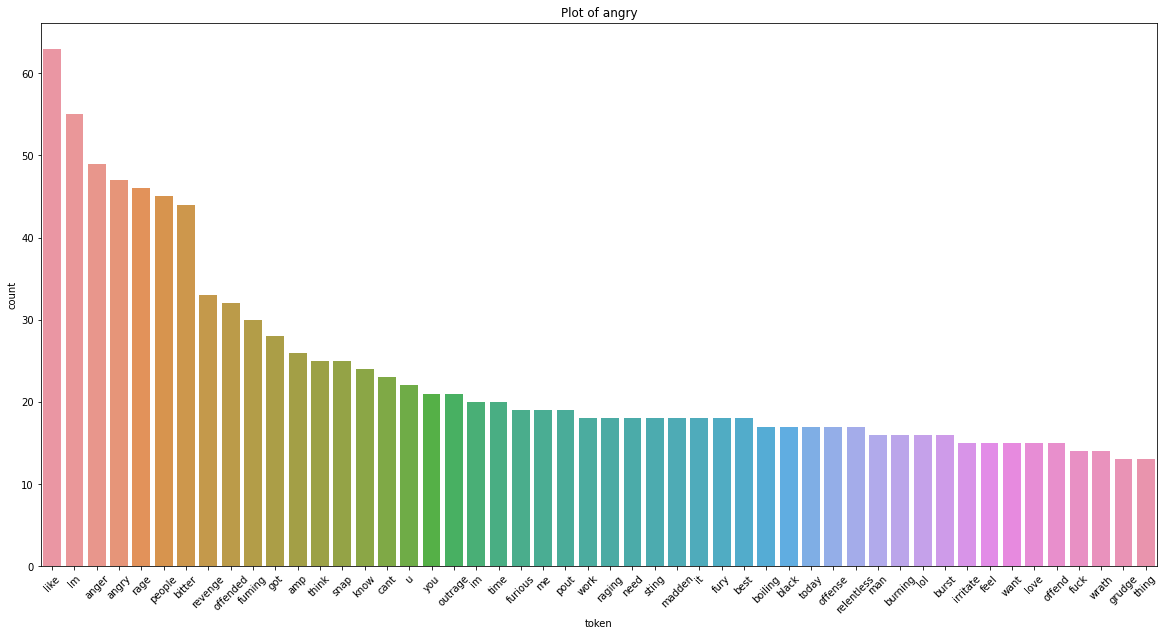

In [26]:
plot_most_common_words(angry_df, 'angry')

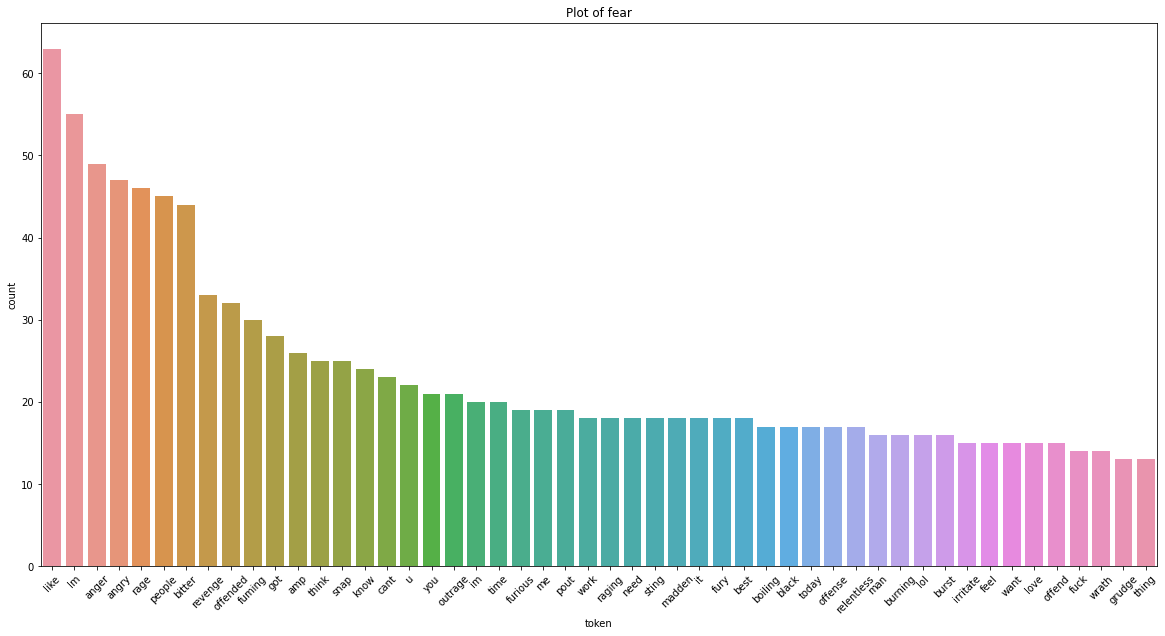

In [27]:
plot_most_common_words(fear_df, 'fear')

In [28]:
# Let's create word cloud
from wordcloud import WordCloud


In [29]:
def plot_word_cloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(10,10))
    plt.imshow(mywordcloud,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

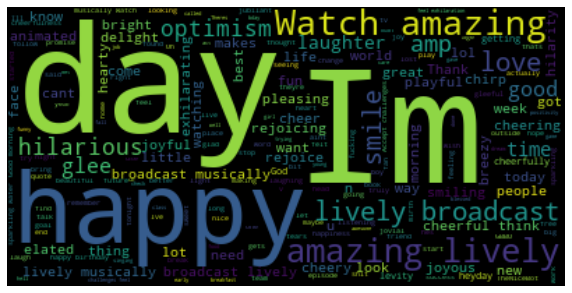

In [30]:
plot_word_cloud(joy_docx)

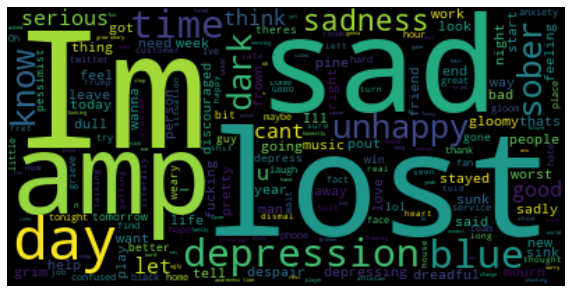

In [31]:
plot_word_cloud(sadness_docx)

## Building Statistical model ---> Naive Bayes

In [32]:
# Load ML Packages

import sklearn
from sklearn.naive_bayes import MultinomialNB

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [33]:
# Creating classification range for Emotion_Intensity  

conditions = [
    (df['Emotion_Intensity'] <= 0.1),
    (df['Emotion_Intensity'] > 0.1) & (df['Emotion_Intensity'] <= 0.2),
    (df['Emotion_Intensity'] > 0.2) & (df['Emotion_Intensity'] <= 0.3),
    (df['Emotion_Intensity'] > 0.3) & (df['Emotion_Intensity'] <= 0.4),
    (df['Emotion_Intensity'] > 0.4) & (df['Emotion_Intensity'] <= 0.5),
    (df['Emotion_Intensity'] > 0.5) & (df['Emotion_Intensity'] <= 0.6),
    (df['Emotion_Intensity'] > 0.6) & (df['Emotion_Intensity'] <= 0.7),
    (df['Emotion_Intensity'] > 0.7) & (df['Emotion_Intensity'] <= 0.8),
    (df['Emotion_Intensity'] > 0.8) & (df['Emotion_Intensity'] <= 0.9),
    (df['Emotion_Intensity'] > 0.9) & (df['Emotion_Intensity'] <= 1.0)
    ]

# create a list of the values we want to assign for each condition
values = ['0 - 0.1', '0.1 - 0.2', '0.2 - 0.3', '0.3 - 0.4','0.4 - 0.5','0.5 - 0.6','0.6 - 0.7','0.7 - 0.8','0.8 - 0.9','0.9 - 1.0']

# create a new column and use np.select to assign values to it using our lists as arguments
df['classf'] = np.select(conditions, values)

In [34]:
df[['Clean_Text','Emotion_Intensity','classf']]

,Clean_Text,Emotion_Intensity,classf
0,fuk heck moved fridge knock landlord door angr...,0.938,0.9 - 1.0
1,Indian Uber driver called N word moving vehicl...,0.896,0.8 - 0.9
2,asked parcel delivered pick store address fu...,0.896,0.8 - 0.9
3,ef whichever butt wipe pulled fire alarm davis...,0.896,0.8 - 0.9
4,join phone you talk rude Taking money acc wi...,0.896,0.8 - 0.9
...,...,...,...
3608,Thank much home stunned happy think sunk ye...,0.104,0.1 - 0.2
3609,winter duvet,0.104,0.1 - 0.2
3610,thats pretty love sky background purple hi...,0.088,0 - 0.1
3611,second artist announcement looking good blue...,0.083,0 - 0.1


In [35]:
X_train_features = df['Clean_Text']
Y_train = df['classf']

print(X_train_features)


0       fuk heck moved fridge knock landlord door angr...
1       Indian Uber driver called N word moving vehicl...
2         asked parcel delivered pick store address fu...
3       ef whichever butt wipe pulled fire alarm davis...
4       join   phone you talk rude Taking money acc wi...
                              ...                        
3608      Thank much home  stunned happy think sunk ye...
3609                                        winter duvet 
3610        thats pretty love sky background purple hi...
3611      second artist announcement looking good blue...
3612    literally eat creamy pesto pasta topped grille...
Name: Clean_Text, Length: 3613, dtype: object


In [36]:
print(Y_train)

0       0.9 - 1.0
1       0.8 - 0.9
2       0.8 - 0.9
3       0.8 - 0.9
4       0.8 - 0.9
          ...    
3608    0.1 - 0.2
3609    0.1 - 0.2
3610      0 - 0.1
3611      0 - 0.1
3612      0 - 0.1
Name: classf, Length: 3613, dtype: object


In [37]:
print(X_train_features.shape)
print(type(X_train_features))

(3613,)
<class 'pandas.core.series.Series'>


In [38]:
# Vectorizer

cv = CountVectorizer()
X = cv.fit_transform(X_train_features)

print(X.shape)
print(type(X))
#print(cv.vocabulary_)
print(X)


(3613, 8576)
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 3005)	1
  (0, 3485)	1
  (0, 4913)	1
  (0, 2965)	1
  (0, 4184)	1
  (0, 4228)	1
  (0, 2242)	1
  (0, 485)	1
  (0, 4530)	1
  (1, 3805)	1
  (1, 7887)	1
  (1, 2290)	1
  (1, 1253)	1
  (1, 8394)	1
  (1, 4921)	1
  (1, 8047)	1
  (1, 3708)	1
  (1, 4073)	1
  (1, 2165)	1
  (2, 622)	1
  (2, 5508)	1
  (2, 2028)	1
  (2, 5661)	1
  (2, 7205)	1
  (2, 294)	1
  :	:
  (3611, 3208)	1
  (3611, 4442)	1
  (3611, 4947)	1
  (3611, 612)	1
  (3611, 1019)	1
  (3611, 502)	1
  (3611, 1020)	1
  (3611, 1239)	1
  (3612, 4382)	1
  (3612, 1436)	1
  (3612, 4333)	1
  (3612, 7320)	1
  (3612, 2346)	1
  (3612, 1956)	1
  (3612, 6856)	1
  (3612, 5685)	1
  (3612, 5541)	1
  (3612, 5248)	1
  (3612, 1800)	1
  (3612, 5626)	1
  (3612, 7735)	1
  (3612, 3284)	1
  (3612, 2282)	1
  (3612, 7710)	1
  (3612, 626)	1


In [39]:
# Get Features by name 
cv.get_feature_names()

['03',
 '0303',
 '04',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '100000000',
 '1000yard',
 '100300',
 '100g',
 '100k',
 '100s',
 '101',
 '1011',
 '102',
 '1030pm',
 '107',
 '1095',
 '10am',
 '10golds24',
 '11',
 '1100pm',
 '1133',
 '1168',
 '11914',
 '11yo',
 '12',
 '1201',
 '1203',
 '121112',
 '1212',
 '123',
 '1230',
 '1279',
 '13',
 '130',
 '133134',
 '13c',
 '1400',
 '1430',
 '1449',
 '148',
 '15',
 '1516',
 '1520',
 '15641616nforge',
 '15yrs',
 '1607',
 '16k',
 '17',
 '172',
 '1722',
 '18',
 '1841',
 '19',
 '1975',
 '1armed',
 '1c',
 '1dayatatime',
 '1n',
 '1pet',
 '1st',
 '1stworldprobs4vs',
 '1tbsp',
 '20',
 '2000',
 '2004',
 '20052007',
 '2012',
 '2014',
 '2015',
 '2016',
 '2016nnature',
 '2017',
 '2020',
 '2034',
 '20au',
 '20likes',
 '20th',
 '21st',
 '22',
 '2222',
 '23',
 '236416',
 '238',
 '23rd',
 '244',
 '248',
 '24th',
 '25',
 '25kish',
 '26',
 '27',
 '28th',
 '2am',
 '2b',
 '2day',
 '2days',
 '2hour',
 '2hr',
 '2k',
 '2k17',
 '2much',
 '2nd',
 '2was',
 '30',
 '300',
 '30

In [40]:
nb_model = MultinomialNB()
nb_model.fit(X, Y_train)

MultinomialNB()

In [41]:
nb_model.score(X, Y_train)


0.7633545530030446

In [42]:
Y_pred = nb_model.predict(X)
Y_pred

array(['0.7 - 0.8', '0.7 - 0.8', '0.6 - 0.7', ..., '0.4 - 0.5',
       '0.2 - 0.3', '0 - 0.1'], dtype='<U9')

In [ ]:
a = ["I am neutral",'I am very happy']

s1 = pd.Series(a)
X1 = cv.transform(s1)
print(s1.shape)
print(s1)

yxs = nb_model.predict(X1)
yxs

## Sentiment intensity Analyser model

In [70]:
blob = TextBlob('I feel like I am drowning. #depression #anxiety #falure #worthless')
sentiment = blob.sentiment.subjectivity
sentiment

0.9

### Deep Learning model

In [44]:
# Load Libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.preprocessing import sequence
    

In [45]:
# Set the number of words we want
top_words = 500
input_length = 50

In [47]:
# setup a simple RNN network
model = Sequential()
model.add(Embedding(top_words, 32, input_length=input_length))
    
model.add(SimpleRNN(512, return_sequences=False, input_shape=(input_length, 32),unroll=True))
    
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

fname = 'best-model.hdf5'
model.save_weights(fname, overwrite=True)

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            16000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 512)               279040    
_________________________________________________________________
dense (Dense)                (None, 500)               256500    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 552,041
Trainable params: 552,041
Non-trainable params: 0
_________________________________________________________________


In [49]:
X.shape

(3613, 8576)

In [55]:
# Fit the model
model.fit(X,Y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5


KeyboardInterrupt: 

In [ ]:
 # Final evaluation of the model
    scores = model.evaluate(X, Y_test, verbose=1)
    print('Accuracy: %.2f%%' % (scores[1]*100))